<a href="https://colab.research.google.com/github/girishprabu/Curneu-Assessment/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [ ]:
db = pd.read_csv('D:/SD03Q06/Diabetes.csv')

In [ ]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
db_copy = db.copy(deep = True)
db_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
print(db_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


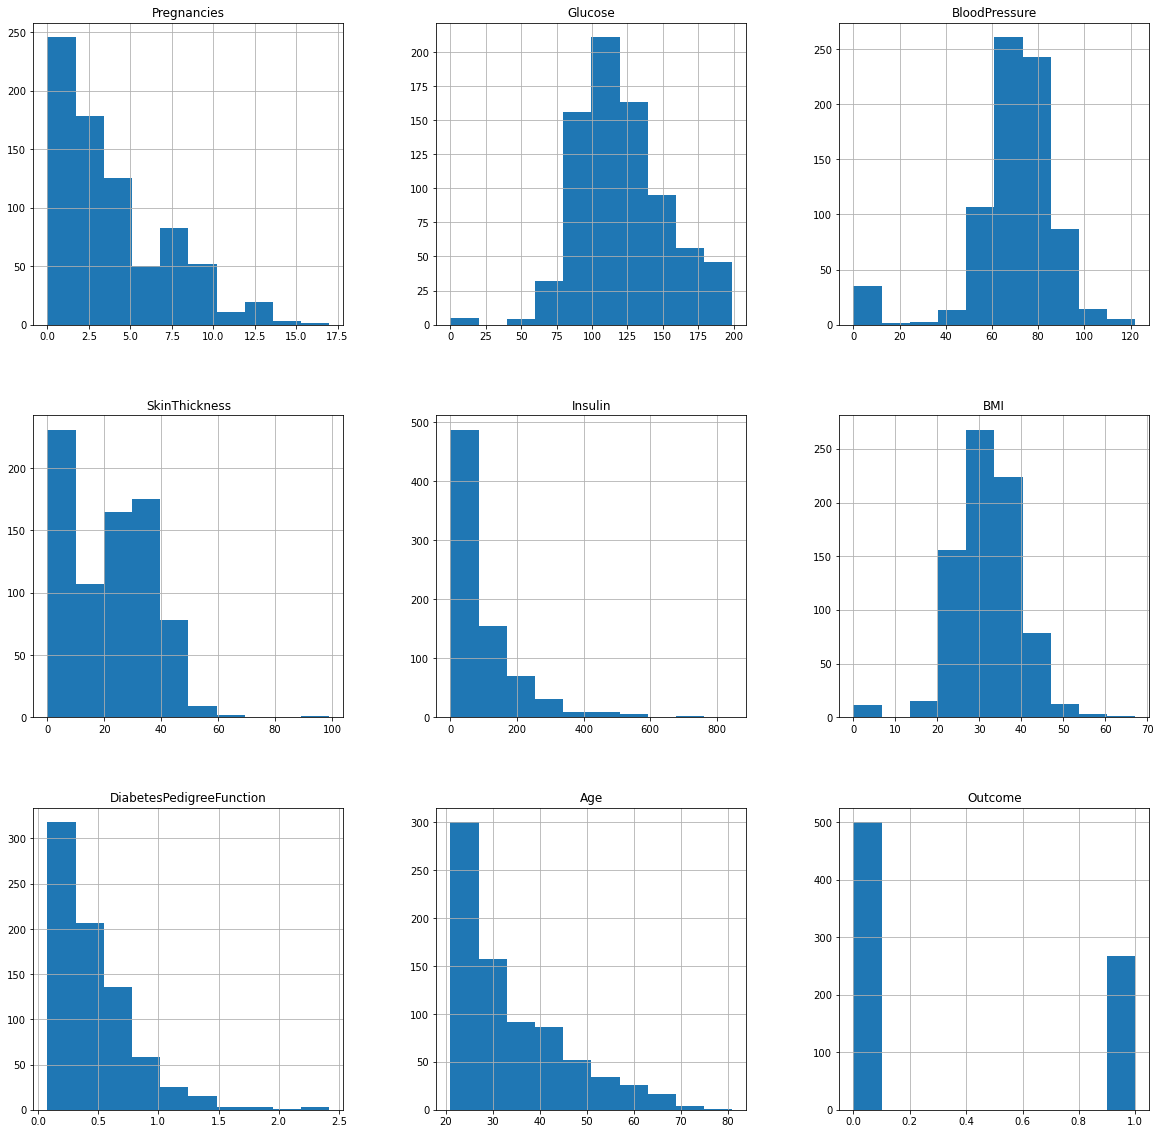

In [ ]:
p = db.hist(figsize = (20,20))

# Filling missing values

In [ ]:
db_copy['Glucose'].fillna(db_copy['Glucose'].median(), inplace = True)

In [ ]:
db_copy['BloodPressure'].fillna(db_copy['BloodPressure'].mean(), inplace = True)

In [ ]:
db_copy['SkinThickness'].fillna(db_copy['SkinThickness'].median(), inplace = True)

In [ ]:
db_copy['Insulin'].fillna(db_copy['Insulin'].median(), inplace = True)

In [ ]:
db_copy['BMI'].fillna(db_copy['BMI'].median(), inplace = True)

In [ ]:
print(db_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<AxesSubplot:ylabel='Outcome'>

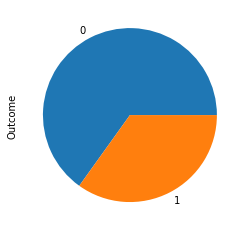

In [ ]:
db.Outcome.value_counts().plot(kind="pie")

<AxesSubplot:xlabel='Pregnancies'>

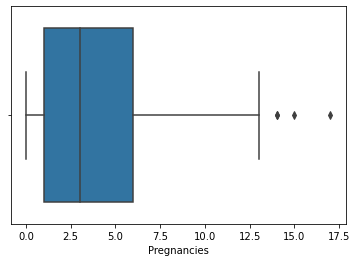

In [ ]:
import seaborn as sns
sns.boxplot(x=db["Pregnancies"])

<AxesSubplot:xlabel='Glucose'>

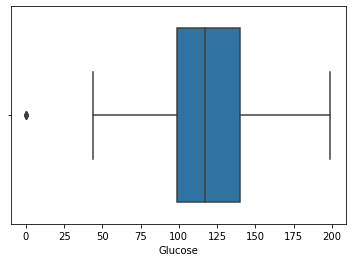

In [ ]:
sns.boxplot(x=db["Glucose"])

<AxesSubplot:xlabel='BloodPressure'>

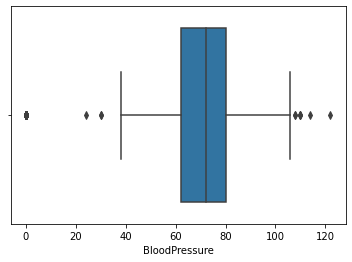

In [ ]:
sns.boxplot(x=db["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness'>

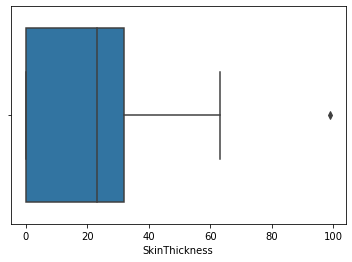

In [ ]:
sns.boxplot(x=db["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

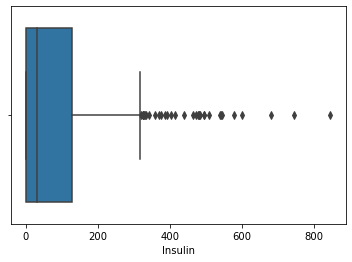

In [ ]:
sns.boxplot(x=db["Insulin"])

<AxesSubplot:xlabel='BMI'>

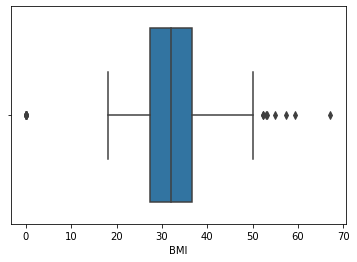

In [ ]:
sns.boxplot(x=db["BMI"])

<AxesSubplot:xlabel='Age'>

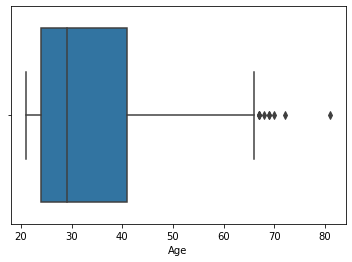

In [ ]:
sns.boxplot(x=db["Age"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

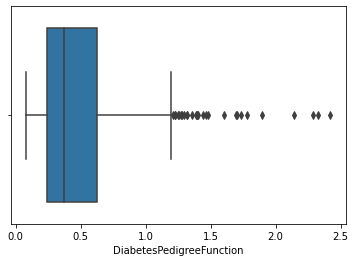

In [ ]:
sns.boxplot(x=db["DiabetesPedigreeFunction"])

# Removing Outliers for Blood Pressure

In [ ]:
Q1 = db["BloodPressure"].quantile(0.25)
Q3 = db["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
db["BloodPressure"] = db["BloodPressure"][~((db["BloodPressure"] < (Q1 - 1.5 * IQR)) |(db["BloodPressure"] > (Q3 + 1.5 * IQR)))]

# Removing Outliers For Insulin

In [ ]:
Q1 = db["Insulin"].quantile(0.25)
Q3 = db["Insulin"].quantile(0.75)
IQR = Q3 - Q1
db["Insulin"] = db["Insulin"][~((db["Insulin"] < (Q1 - 1.5 * IQR)) |(db["Insulin"] > (Q3 + 1.5 * IQR)))]

# Removing Outliers for BMI

In [ ]:
Q1 = db["BMI"].quantile(0.25)
Q3 = db["BMI"].quantile(0.75)
IQR = Q3 - Q1
db["BMI"] = db["BMI"][~((db["BMI"] < (Q1 - 1.5 * IQR)) |(db["BMI"] > (Q3 + 1.5 * IQR)))]


# Removing Outliers for Diabetes Pedigree Function

In [ ]:
Q1 = db["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = db["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
db["DiabetesPedigreeFunction"] = db["DiabetesPedigreeFunction"][~((db["DiabetesPedigreeFunction"] < (Q1 - 1.5 * IQR)) |(db["DiabetesPedigreeFunction"] > (Q3 + 1.5 * IQR)))]

In [ ]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             723 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   734 non-null    float64
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


# Removing Rows with Missing Values

In [ ]:
db.dropna(subset = ["Insulin","BloodPressure","BMI","DiabetesPedigreeFunction"], inplace=True)
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               656 non-null    int64  
 1   Glucose                   656 non-null    int64  
 2   BloodPressure             656 non-null    float64
 3   SkinThickness             656 non-null    int64  
 4   Insulin                   656 non-null    float64
 5   BMI                       656 non-null    float64
 6   DiabetesPedigreeFunction  656 non-null    float64
 7   Age                       656 non-null    int64  
 8   Outcome                   656 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.2 KB


In [ ]:
#db["Age"].describe()
def category(a):
    if a <= 20:
        return "young"
    elif a > 20 and a < 50:
        return "middle"
    elif a >= 50:
        return "old"

db["Age_new"] = db["Age"].apply(lambda x : category(x))
    

<AxesSubplot:xlabel='Age_new', ylabel='count'>

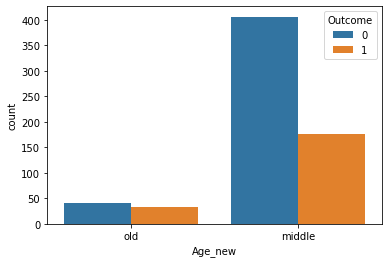

In [ ]:
sns.countplot(x = db["Age_new"], hue = db["Outcome"])

<AxesSubplot:xlabel='BMI_new', ylabel='count'>

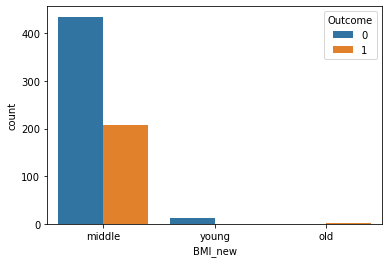

In [ ]:
def category1(a):
    if a < 18.5:
        return "Under weight"
    elif a >= 18 and a <= 25:
        return "Correct weight"
    elif a > 25:
        return "Over weight"

db["BMI_new"] = db["BMI"].apply(lambda x : category(x))

sns.countplot(x = db["BMI_new"], hue = db["Outcome"])

# Scaling

In [ ]:
scaler = StandardScaler()
db.iloc[:,:-1] = scaler.fit_transform(db.iloc[:,:-1])

In [ ]:
db = pd.DataFrame(db)

# KNN

In [ ]:
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] = mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  
def main() : 
      
    # Importing dataset 
      
     
  
    X = db.iloc[:,:-1].values 
  
    Y = db.iloc[:,-1:].values 
      
    # Splitting dataset into train and test set 
  
    X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size = 1/3, random_state = 0 ) 
      
    # Model training 
      
    model = K_Nearest_Neighbors_Classifier( K = 3 ) 
      
    model.fit( X_train, Y_train ) 
      
    model1 = KNeighborsClassifier( n_neighbors = 3 ) 
      
    model1.fit( X_train, Y_train ) 
      
    # Prediction on test set 
  
    Y_pred = model.predict( X_test ) 
      
    Y_pred1 = model1.predict( X_test ) 
      
    # measure performance 
      
    correctly_classified = 0
      
    correctly_classified1 = 0
      
    # counter 
      
    count = 0
      
    for count in range( np.size( Y_pred ) ) : 
          
        if Y_test[count] == Y_pred[count] : 
              
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] : 
              
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", (  
      correctly_classified / count ) * 100 ) 
    print( "Accuracy on test set by sklearn model   :  ", (  
      correctly_classified1 / count ) * 100 ) 
    
      

In [ ]:
if __name__ == "__main__" :  
      
    main()

<ipython-input-493-6733aecb6bda>:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit( X_train, Y_train )


Accuracy on test set by our model       :   75.34246575342466
Accuracy on test set by sklearn model   :   75.34246575342466


# SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7969543147208121
